# 0. Previo

## 0.1. Montaje del Drive

Se monta el Google Drive en el notebook de Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0.2. Imports

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# 1. Limpieza de spanish_houses.csv

## 1.0. Creación houses

Se crea el dtaframe houses a partir de varias columnas del df spanish_houses

In [ ]:
spanish_houses = pd.read_csv('/content/drive/MyDrive/PRA2 Visualización/spanish_houses.csv')
# Obtén las columnas seleccionadas del DataFrame "spanish_houses"
selected_columns = ["house_id", "loc_zone", "garden", "unfurnished", "storage_room", "air_conditioner",
                    "swimming_pool", "built_in_wardrobe", "bath_num", "room_num", "price", "renta_media_prov",
                    "condition", "house_type", "m2_real", "m2_useful"]

# Crea el nuevo DataFrame "houses" con las columnas seleccionadas
houses = spanish_houses[selected_columns].copy()

new_column_names = {
    "house_id": "id",
    "loc_zone": "ubicacion",
    "garden": "jardin",
    "unfurnished": "sin_amueblar",
    "storage_room": "trastero",
    "air_conditioner": "aire_acondicionado",
    "swimming_pool": "piscina",
    "built_in_wardrobe": "armarios",
    "bath_num": "baños",
    "room_num": "habitaciones",
    "price": "precio",
    "renta_media_prov": "renta_media",
    "condition": "estado",
    "house_type": "tipo",
    "m2_real": "m2_real",
    "m2_useful": "m2_util"
}

houses = houses.rename(columns=new_column_names)

## 1.1. Limpieza columna 'ubicacion'

In [ ]:
houses['ubicacion'] = houses['ubicacion'].str.split(',')

for i, ubicacion_array in enumerate(houses['ubicacion']):
    if ubicacion_array[-1] == 'loc_zone':
        houses['ubicacion'][i] = ubicacion_array[:-1]

houses = houses[houses['ubicacion'].apply(lambda arr: len(arr) > 0)]
houses['ubicacion'] = houses['ubicacion'].apply(lambda arr: [arr[-1]])
houses['ubicacion'] = houses['ubicacion'].apply(lambda arr: ', '.join(arr))

houses['ubicacion'] = houses['ubicacion'].str.replace(' ','').replace()
houses['ubicacion'] = houses['ubicacion'].str.replace("Balears","Baleares")
houses['ubicacion'] = houses['ubicacion'].str.replace("Illes","")
houses['ubicacion'] = houses['ubicacion'].str.replace(re.escape("()"),"")
#houses.loc[i, 'ubicacion'] = houses.loc[i, 'ubicacion'][:-1].replace("Balears(Illes)", "Baleares")
houses['ubicacion'] = houses['ubicacion'].str.replace('CiudadReal','Ciudad Real')
houses['ubicacion'] = houses['ubicacion'].str.replace('ACoruña','A Coruña')
houses['ubicacion'] = houses['ubicacion'].str.replace('SantaCruzdeTenerife','Santa Cruz de Tenerife')
houses['ubicacion'] = houses['ubicacion'].str.replace('València','Valencia')
houses['ubicacion'] = houses['ubicacion'].str.replace('Zamor','Zamora')

<ipython-input-180-6df725c6823d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['ubicacion'][i] = ubicacion_array[:-1]
<ipython-input-180-6df725c6823d>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  houses['ubicacion'] = houses['ubicacion'].str.replace(re.escape("()"),"")


In [ ]:
print(houses['ubicacion'].unique())

['Álava' 'Albacete' 'Alicante' 'Baleares' 'Barcelona' 'Vizcaya' 'Cádiz'
 'Ciudad Real' 'A Coruña' 'Guipúzcoa' 'Girona' 'Huelva' 'Madrid'
 'Santa Cruz de Tenerife' 'Segovia' 'Sevilla' 'Soria' 'Valencia'
 'Valladolid' 'Tarragona' 'Zamoraa']


## 1.2. Limpieza columna 'sin_amueblar'

In [ ]:
houses['sin_amueblar'] = houses['sin_amueblar'].fillna('0').astype(str)
houses['sin_amueblar'] = houses['sin_amueblar'].replace('1.0', '1')

## 1.3. Limpieza columna 'baños'

In [ ]:
houses['baños'] = houses['baños'].replace('sin baños', '0')

## 1.4. Limpieza columna 'habitaciones'

In [ ]:
houses['habitaciones'] = houses['habitaciones'].replace('sin habitación', '0')

## 1.5. Limpieza columna 'renta_media'

In [ ]:
houses['renta_media'] = houses['renta_media'].apply(lambda x: x * 1000 if x < 100 else x)
houses['renta_media'] = houses['renta_media'].replace('nan', np.nan)

## 1.5. Cambios de tipos

In [ ]:
houses['jardin'] = houses['jardin'].astype(int)
houses['sin_amueblar'] = houses['sin_amueblar'].astype(int)
houses['trastero'] = houses['trastero'].astype(int)
houses['aire_acondicionado'] = houses['aire_acondicionado'].astype(int)
houses['piscina'] = houses['piscina'].astype(int)
houses['armarios'] = houses['armarios'].astype(int)
houses['baños'] = houses['baños'].astype(int)
houses['habitaciones'] = houses['habitaciones'].astype(int)
houses['renta_media'] = houses['renta_media'].astype(float)
houses['m2_real'] = houses['m2_real'].astype(float)
houses['m2_util'] = houses['m2_util'].astype(float)

## 1.6. Columnas 'alquiler', 'nuevo' y 'necesario_reformar'

In [ ]:
houses['alquiler'] = houses['tipo'].apply(lambda x: 1 if 'Alquiler' in x else 0)
#print(houses['estado'])
houses = houses.dropna(subset=['estado'])
houses['nuevo'] = houses['estado'].apply(lambda x: 1 if 'promoción de obra nueva' in x else 0)
houses['necesario_reformar'] = houses['estado'].apply(lambda x: 1 if 'para reformar' in x else 0)
houses = houses.drop('estado', axis=1)


<ipython-input-187-1f69c6271a56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['nuevo'] = houses['estado'].apply(lambda x: 1 if 'promoción de obra nueva' in x else 0)
<ipython-input-187-1f69c6271a56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses['necesario_reformar'] = houses['estado'].apply(lambda x: 1 if 'para reformar' in x else 0)


## 1.7. Columnas Precio por Metro Cuadrado

In [ ]:
houses['precio_m2_real'] = houses['precio'].astype(float) / houses['m2_real'].astype(float)
houses['precio_m2_util'] = houses['precio'].astype(float) / houses['m2_util'].astype(float)

## 1.8. Columnas Años de Trabajo para Pagar el Inmueble y Porcentaje del Sueldo Destinado al Alquiler

In [ ]:
houses['años_para_pagar'] = np.where(houses['alquiler'] == 0, houses['precio'].astype(float) / houses['renta_media'].astype(float), '')
houses['años_para_pagar'] = houses['años_para_pagar'].replace('nan', np.nan)
houses['porcentaje_alquiler'] = np.where(houses['alquiler'] == 1, (houses['precio'].astype(float) / (houses['renta_media'].astype(float) / 12))*100, '')
houses['porcentaje_alquiler'] = houses['porcentaje_alquiler'].replace('nan', np.nan)

# 2. Creación de houses_summary

In [ ]:
natalidad = "/content/drive/MyDrive/PRA2 Visualización/natalidad.geojson"
map_data = gpd.read_file(natalidad)

# Crear el dataframe houses_summary
houses_summary = pd.DataFrame()

# Copiar las columnas NAME_1, NAME_2 y geometry del dataframe map_data a houses_summary
houses_summary['CA'] = map_data['NAME_1']
houses_summary['provincia'] = map_data['NAME_2']
houses_summary['geometry'] = map_data['geometry']

## 2.1. Precio Medio Comprar

In [ ]:
houses_comprar = houses[houses['alquiler'] == 0]
houses_comprar_agrupado = houses_comprar.groupby('ubicacion')['precio']
diccionario_ubicaciones_precios = {}
for precios_agrupados in houses_comprar_agrupado:
  ubicacion = precios_agrupados[0]
  precio_medio_comprar = precios_agrupados[1].astype(float).mean()
  diccionario_ubicaciones_precios[ubicacion] = round(precio_medio_comprar/1000,2)
print(diccionario_ubicaciones_precios)

houses_summary['precio_medio_comprar'] = houses_summary['provincia'].map(diccionario_ubicaciones_precios)

{'A Coruña': 183.29, 'Albacete': 130.91, 'Alicante': 156.15, 'Baleares': 710.28, 'Barcelona': 209.93, 'Ciudad Real': 94.6, 'Cádiz': 103.51, 'Girona': 254.16, 'Guipúzcoa': 361.9, 'Huelva': 104.99, 'Madrid': 481.18, 'Santa Cruz de Tenerife': 251.39, 'Segovia': 185.7, 'Sevilla': 194.47, 'Soria': 118.39, 'Tarragona': 273.86, 'Valencia': 177.82, 'Valladolid': 202.4, 'Vizcaya': 342.68, 'Zamoraa': 112.27, 'Álava': 246.45}


## 2.3. Precio Medio M2 Comprar

In [ ]:
houses_comprar_m2_agrupado = houses_comprar.groupby('ubicacion')['precio_m2_real']
diccionario_ubicaciones_precios_m2 = {}
for precios_m2_agrupados in houses_comprar_m2_agrupado:
  ubicacion = precios_m2_agrupados[0]
  precio_medio_comprar_m2 = precios_m2_agrupados[1].astype(float).mean()
  diccionario_ubicaciones_precios_m2[ubicacion] = round(precio_medio_comprar_m2/1000,2)
print(diccionario_ubicaciones_precios)

houses_summary['precio_medio_comprar_m2'] = houses_summary['provincia'].map(diccionario_ubicaciones_precios_m2)

{'A Coruña': 183.29, 'Albacete': 130.91, 'Alicante': 156.15, 'Baleares': 710.28, 'Barcelona': 209.93, 'Ciudad Real': 94.6, 'Cádiz': 103.51, 'Girona': 254.16, 'Guipúzcoa': 361.9, 'Huelva': 104.99, 'Madrid': 481.18, 'Santa Cruz de Tenerife': 251.39, 'Segovia': 185.7, 'Sevilla': 194.47, 'Soria': 118.39, 'Tarragona': 273.86, 'Valencia': 177.82, 'Valladolid': 202.4, 'Vizcaya': 342.68, 'Zamoraa': 112.27, 'Álava': 246.45}


In [ ]:
print(houses_summary.head(10))
gdf = gpd.GeoDataFrame(houses_summary, geometry=houses_summary['geometry'])
houses_summary = gdf
print(houses_summary.head(10))

          CA provincia                                           geometry  \
0  Andalucía   Almería  MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...   
1  Andalucía     Cádiz  MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...   
2  Andalucía   Córdoba  MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...   
3  Andalucía   Granada  MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...   
4  Andalucía    Huelva  MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...   
5  Andalucía      Jaén  MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37...   
6  Andalucía    Málaga  MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36...   
7  Andalucía   Sevilla  MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36...   
8     Aragón    Huesca  MULTIPOLYGON (((0.34747 41.42733, 0.34187 41.4...   
9     Aragón    Teruel  MULTIPOLYGON (((0.02648 40.69497, 0.02688 40.7...   

   precio_medio_comprar  precio_medio_comprar_m2  
0                   NaN                      NaN  
1                103.51                     0.87  

# 3. Creación de los Mapas

## 3.1. Precio Medio de los Inmuebles

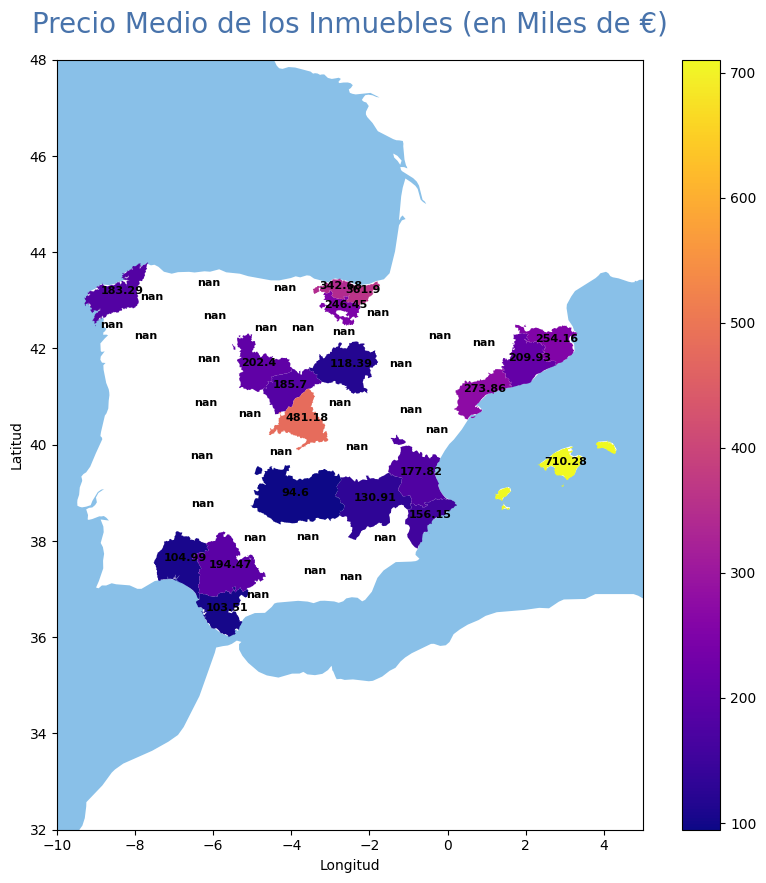

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Control del encuadre (área geográfica) del mapa
ax.axis([-10, 5, 32, 48])
#ax.axis([-18, 10, 27, 48])
# Control del título y los ejes
ax.set_title('Precio Medio de los Inmuebles (en Miles de €)',
             pad=20,
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Cargar un mapa base con contornos de países
oceanos = "/content/drive/MyDrive/PRA2 Visualización/ne_50m_ocean/ne_50m_ocean.shp"
map_oceanos = gpd.read_file(oceanos, repair=True)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

# Generar y cargar el mapa
houses_summary.plot(column='precio_medio_comprar', cmap='plasma', ax=ax,
              legend=True, zorder=1)

# Iterar sobre cada geometría del mapa
for idx, row in houses_summary.iterrows():
    # Obtener la geometría y el valor de precio_medio_comprar de la fila actual
    geom = row['geometry']
    precio_medio = row['precio_medio_comprar']

    # Obtener el centroide de la geometría para ubicar el texto
    centroid = geom.centroid

    # Agregar el valor de precio_medio_comprar como texto en el centroide de la geometría
    ax.annotate(text=str(precio_medio),
                xy=(centroid.x, centroid.y),
                xytext=(-12, 0),  # Desplazamiento a la izquierda
                textcoords="offset points",
                fontsize=8,
                color='black',
                fontweight='bold',
                zorder=2)

# Mostrar el mapa
plt.show()

## 3.2. Precio Medio del M2

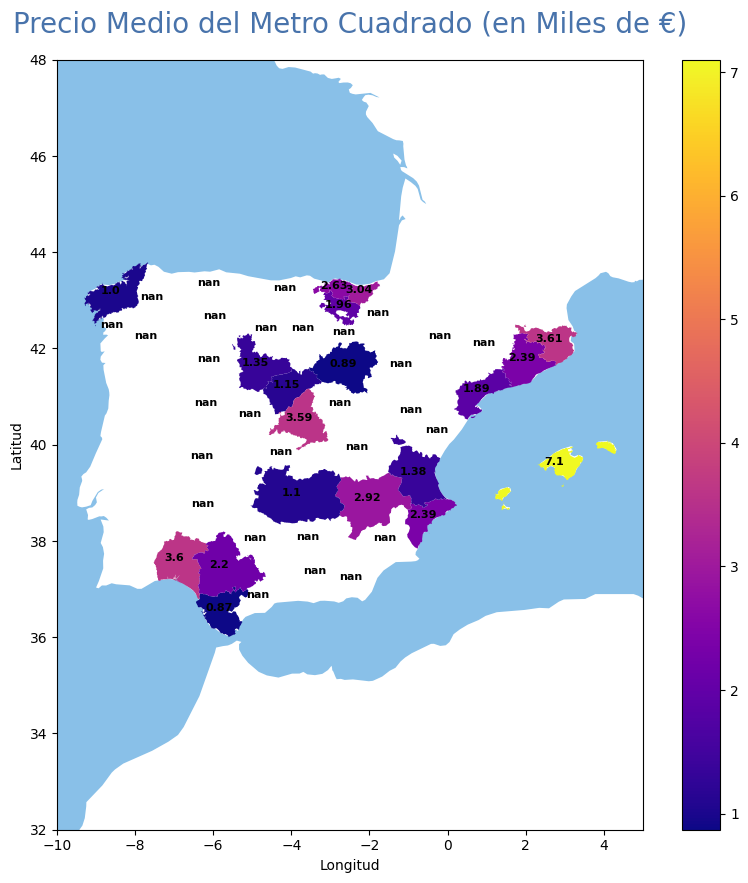

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Control del encuadre (área geográfica) del mapa
ax.axis([-10, 5, 32, 48])
#ax.axis([-18, 10, 27, 48])
# Control del título y los ejes
ax.set_title('Precio Medio del Metro Cuadrado (en Miles de €)',
             pad=20,
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Cargar un mapa base con contornos de países
oceanos = "/content/drive/MyDrive/PRA2 Visualización/ne_50m_ocean/ne_50m_ocean.shp"
map_oceanos = gpd.read_file(oceanos, repair=True)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

# Generar y cargar el mapa
houses_summary.plot(column='precio_medio_comprar_m2', cmap='plasma', ax=ax,
              legend=True, zorder=1)

# Iterar sobre cada geometría del mapa
for idx, row in houses_summary.iterrows():
    # Obtener la geometría y el valor de precio_medio_comprar_m2 de la fila actual
    geom = row['geometry']
    precio_medio = row['precio_medio_comprar_m2']

    # Obtener el centroide de la geometría para ubicar el texto
    centroid = geom.centroid

    # Agregar el valor de precio_medio_comprar_m2 como texto en el centroide de la geometría
    ax.annotate(text=str(precio_medio),
                xy=(centroid.x, centroid.y),
                xytext=(-12, 0),  # Desplazamiento a la izquierda
                textcoords="offset points",
                fontsize=8,
                color='black',
                fontweight='bold',
                zorder=2)

# Mostrar el mapa
plt.show()